# Analyze summary of movies for specific keywords that catches user’s attention
# Get most popular genre by Imdb votes and compare most popular genre and least popular summaries to see if there is room for improvement in the word formation of summaries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

## 1. Based on different genres, sort movies by popularity and choose the top 30% separately.¶

In [149]:
# import the dataset
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

# drop series, leave movies
df.rename(columns={'Series or Movie':'SeriesOrMovie'},inplace=True)
df.drop(df[df.SeriesOrMovie=='Series'].index, inplace=True)

# seperate multiple genres in one column
df['Genre'] = df['Genre'].str.split(",")  
df_splt = df.explode('Genre')
df_splt.head(10)
df_splt['Genre'].unique()
import datetime 
countbygenre=df_splt.groupby(['Genre']).sum()['IMDb Votes'].sort_values(ascending=False)
df_splt['Netflix Release Date'] = pd.to_datetime(df_splt['Netflix Release Date'], format='%m/%d/%Y')
df_splt['Netflix Release Date'] = [x.date() for x in df_splt['Netflix Release Date']]

In [160]:
#Compare the most popular genre summary words to the least popular genre summary words
# get top 30% of popular movies in Family

summary_family_top = popular_movies_per_genre('Genre','Netflix Release Date',0,'Family')
# get top 30% of least popular movies in Family

summary_family_bottom = popular_movies_per_genre('Genre','Netflix Release Date',1,'Family')

countbygenre
rom_com_top['Netflix Release Date']


1118    2020-11-13
3733    2020-03-13
560     2020-12-23
1106    2020-11-16
2622    2020-12-08
2072    2020-07-01
431     2021-01-01
Name: Netflix Release Date, dtype: object

In [152]:
def popular_movies_per_genre(colFilter1,colFilter2,sort,colFilterValue1):
    rom_com_top=df_splt[(df_splt[colFilter1] == colFilterValue1) & (df_splt[colFilter2] > datetime.date(2020,1,1))]
    if sort==0:
        rom_com_top.sort_values(by=['IMDb Votes'],ascending=False)
    rom_com_top.sort_values(by=['IMDb Votes'],ascending=True)
    rom_com_top = rom_com_top.head(int(0.3 * len(rom_com_top)))
    summary_rom_com_top = rom_com_top['Summary']
    return summary_rom_com_top

In [161]:
# get top 30% of popular movies in Action

summary_action_top =  popular_movies_per_genre('Genre','Netflix Release Date',0,'Action')
# get top 30% of least popular movies in Action

summary_action_bottom =  popular_movies_per_genre('Genre','Netflix Release Date',1,'Action')

In [135]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords



import pandas as pd
import nltk
from wordcloud import wordcloud 
from nltk.corpus import stopwords

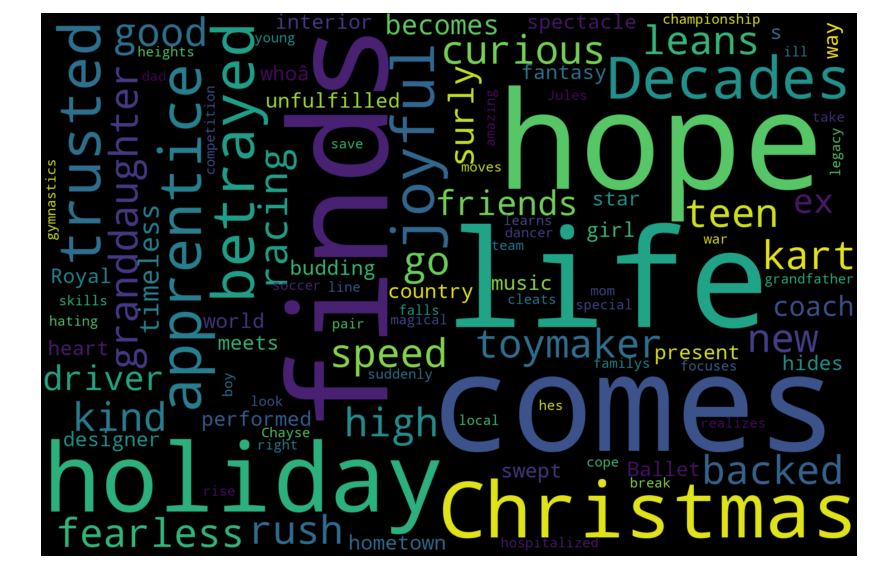

In [162]:
# # Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
# Action Top
actionwc= word_popular_movies_summary(summary_action_top)

# Family top 
familywc= word_popular_movies_summary(summary_family_top)



In [157]:
def word_popular_movies_summary(summary):
    summary= summary.apply(wordnet_lem.lemmatize)
    all_words_top = ' '.join([word for word in summary])
    len(all_words_top)
    wordcloud_top = WordCloud(width=600, 
                         height=400, 
                             random_state=2, 
                         max_font_size=100
                        ,background_color="black"
                          ,scale=3).generate(all_words_top)
    return wordcloud_top

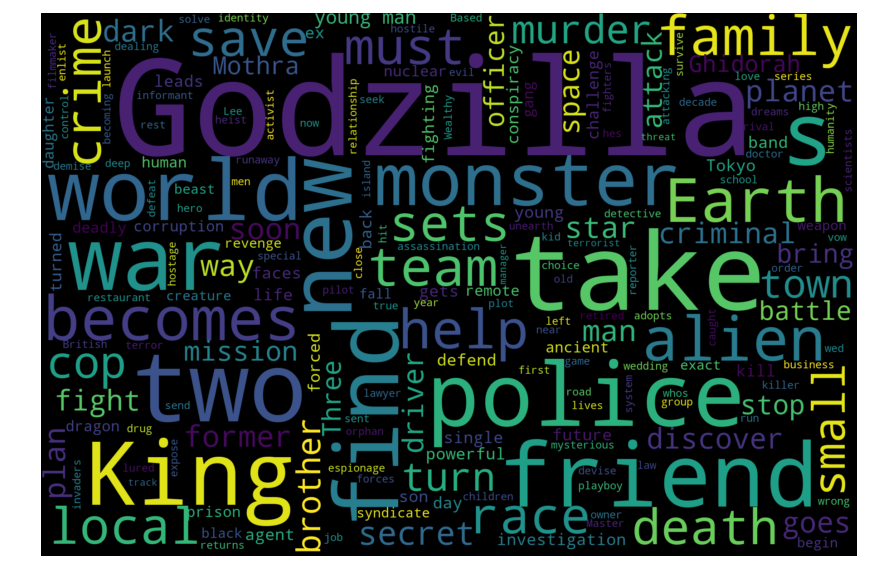

In [164]:

plt.figure(figsize=(20, 10))
plt.imshow(actionwc, interpolation='bilinear')
plt.axis('off');

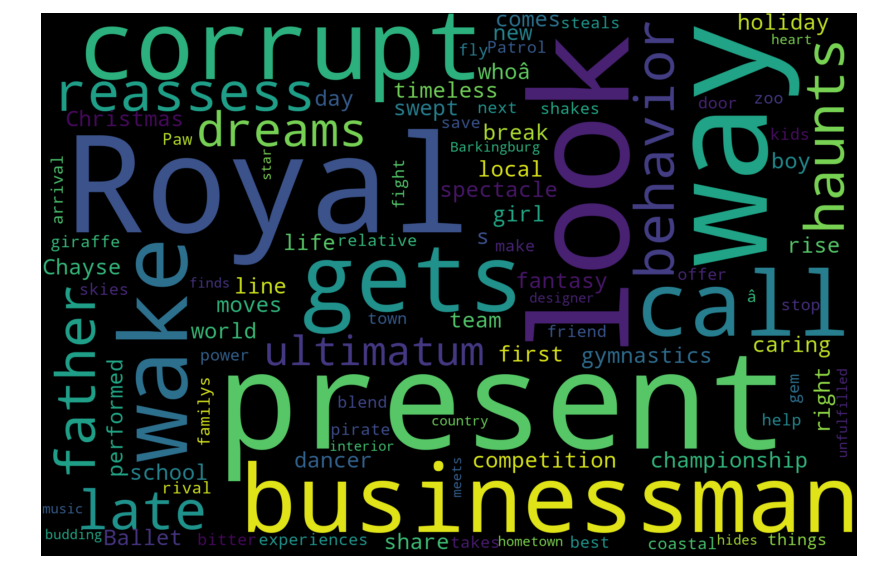

In [165]:

plt.figure(figsize=(20, 10))
plt.imshow(familywc, interpolation='bilinear')
plt.axis('off');

### the Family genre summary words are not relevant and the action genre summary is related to car chasing, Cop , crime etc. Netflix can improve the least popular genres like Family genre's summary word formation.